In [1]:
import importlib
import os.path as op
import sys

import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial
import scipy.stats

# import factory modules
factory_dir = r"C:\Users\Alan\Documents\hybridfactory"
sys.path.insert(0, factory_dir)

import factory.io.gt

# import parameters and probe data
hybrid_dir = r"C:\Users\Alan\Documents\Data\npix-hybrid"
sys.path.insert(0, hybrid_dir)

params = importlib.import_module("npix-gen-20180510")
probe = importlib.import_module(f"factory.probes.{params.probe_type}")

In [2]:
%matplotlib notebook

In [3]:
file_size_bytes = op.getsize(params.raw_source_file)
byte_count = np.dtype(params.data_type).itemsize  # number of bytes in data type
nrows = probe.NCHANS
ncols = file_size_bytes // (nrows * byte_count)

params.num_samples = ncols

source = np.memmap(params.raw_source_file, dtype=params.data_type, offset=params.offset, mode="r",
                   shape=(nrows, ncols), order="F")
target = np.memmap(params.raw_target_file, dtype=params.data_type, offset=params.offset, mode="r",
                   shape=(nrows, ncols), order="F")

In [4]:
firings_true = factory.io.gt.load_gt_units(hybrid_dir) # unsigned int
true_times = firings_true[1, :].astype(np.int64) + 1 # signed int
true_labels = firings_true[2, :].astype(np.int64)
true_channels = firings_true[0, :].astype(np.int64)

# check for overflow
assert true_times.min() > -1
assert true_labels.min() > -1

# ensure times are sorted
assert (true_times == np.sort(true_times)).all()

<IPython.core.display.Javascript object>


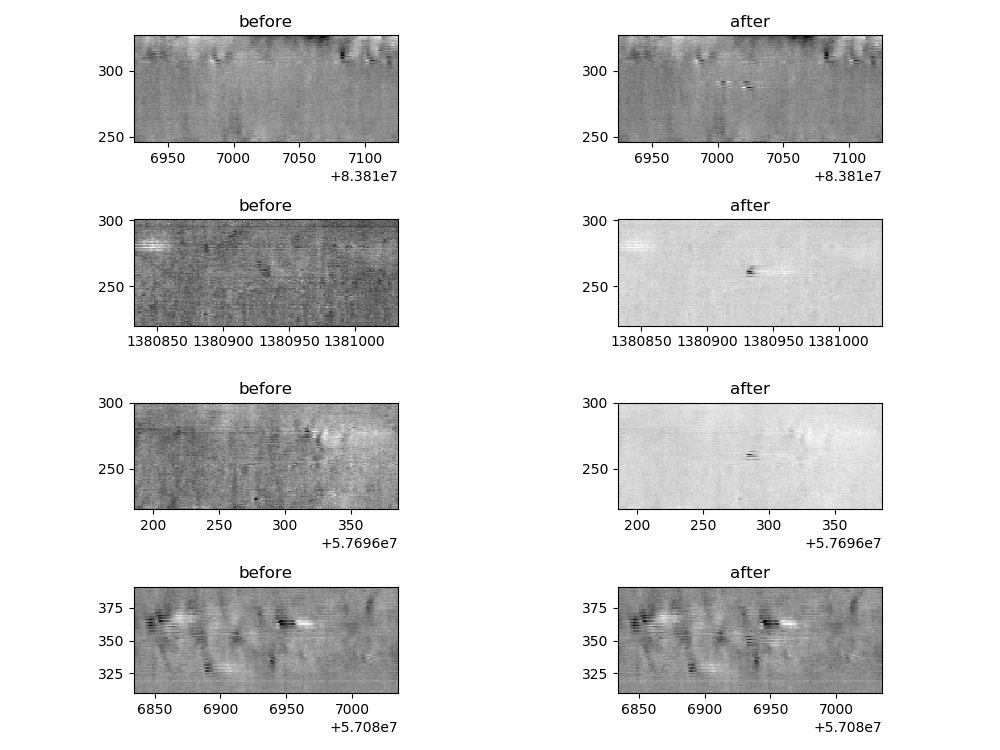

In [5]:
np.random.seed(10191)

fig, ax = plt.subplots(4, 2)

for i, k in enumerate(np.random.choice(true_times.size, size=4, replace=False)):
    t = true_times[k]
    chan = true_channels[k]
    
    left = t - 100
    right = t + 101
    bottom = chan - 40
    top = chan + 41
    
    swin = np.array(source[bottom:top, left:right].copy()).astype(np.float64)
    swin -= swin.min()
    swin /= swin.max()
    twin = np.array(target[bottom:top, left:right].copy()).astype(np.float64)
    twin -= twin.min()
    twin /= twin.max()
    
    ax[i, 0].imshow(swin, "gray", extent=(left, right, bottom, top), interpolation="nearest")
    ax[i, 0].set_title("before")
    #fig.colorbar(ax[i,0].images[0], ax=ax[i, 0])
    
    ax[i, 1].imshow(twin, "gray", extent=(left, right, bottom, top), interpolation="nearest")
    ax[i, 1].set_title("after")
    #fig.colorbar(ax[i,1].images[0], ax=ax[i, 1])

fig.set_size_inches([10, 7.5])
fig.tight_layout()